# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muslihah
- **Email:** mussilihah@gmail.com
- **ID Dicoding:** muslihah_0

## Menentukan Pertanyaan Bisnis

- Apakah terjadi perbedaan signifikan penggunaan sepeda pada weekday, holiday dan workingday?
- Apakah terjadi peningkatan penggunaan sepeda dari tahun 2011 ke 2012?
- Apakah ada jam-jam tertentu yang menunjukkan peningkatan peminjaman sepeda?
- Dapatkah musim mempengaruhi peminjaman sepeda pada casual user dan registered user?
- Apakah cuaca dapat mempengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

## Data Wrangling

### Gathering Data

Dalam tahapan ini, kita akan mengumpulkan dataset yang akan digunakan. Pada proyek ini dataset yang digunakan merupakan **Bike Sharing Dataset**, maka yang akan diimport adalah file **day.csv** dan **hour.csv**

Menyambungkan google coolab ke google drive agar bisa mengakses dataset

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Membaca data day.csv

In [187]:
df_day = pd.read_csv('/content/drive/MyDrive/dataset/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


####Membaca data hour.csv

In [188]:
df_hour = pd.read_csv('/content/drive/MyDrive/dataset/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini, kita akan melakukan penilaian pada data yang telah dikumpulkan.

####Penilaian data df_day

1. Memeriksa informasi tipe data df_day

In [189]:
print("Informasi Data Day:\n")
df_day.info()

Informasi Data Day:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari informasi di atas didapatkan bahwa column dteday, tipe datanya adalah object yang seharusnya bertipe datetime, sehingga hal ini perlu untuk diperbaiki. Selain dteday, tipe data untuk column yang lain telah sesuai.

2. Memeriksa apakah terdapat missing values

In [190]:
print("Jumlah Missing Values dalam Data Day:")
df_day.isna().sum()

Jumlah Missing Values dalam Data Day:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil di atas, dapat diketahui bahwa data df_day tidak terdapat missing value.

3. Memeriksa apakah terdapat duplicate data

In [191]:
print("Jumlah Duplikat dalam Data Day:", df_day.duplicated().sum())

Jumlah Duplikat dalam Data Day: 0


Karena hasil di atas mencetak 0, maka artinya tidak terdapat data yang double pada df_day.

4. Memeriksa apakah ada data yang bernilai '?'

In [192]:
print("Apakah terdapat data bernilai ? dalam data day:")
df_day.isin(['?']).any()

Apakah terdapat data bernilai ? dalam data day:


instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

Kasil hasil di atas menunjukkan False pada semua column, maka tidak terdapat data yang bernilai ? pada data df_day.

5. Memeriksa nilai NaN (Not a Number)

In [193]:
print("Jumlah nilai Nan dalam Data Day:")
df_day.isna().sum()

Jumlah nilai Nan dalam Data Day:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Karena hasil di atas menunjukkan pada semua kolom hasilnya 0, maka tidak terdapat nilai NaN dalam data df_day.

6. Memeriksa nilai statistik

In [194]:
print("Nilai Statistik dalam Data Day\n")
df_day.describe()

Nilai Statistik dalam Data Day



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data di atas menunjukkan bahwa nilai statistik yang dihasilkan adalah normal, maka tidak perlu dilakukan normalisasi data.

#### Penilaian data df_hour

1. Memeriksa informasi tipe data df_hour

In [195]:
print("Informasi Data Hour:\n")
df_hour.info()

Informasi Data Hour:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti data df_day data df_hour juga menunjukkan bahwa column dteday, tipe datanya adalah object yang seharusnya bertipe datetime, sehingga hal ini perlu untuk diperbaiki. Selain dteday, tipe data untuk column yang lain telah sesuai.

2. Memeriksa apakah terdapat missing values pada df_hour

In [196]:
print("Jumlah Missing Values dalam Data Hour:")
df_hour.isna().sum()

Jumlah Missing Values dalam Data Hour:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil di atas, dapat diketahui bahwa data df_hour tidak terdapat missing value.

3. Memeriksa apakah terdapat duplicate data pada df_hour

In [197]:
print("Jumlah Duplikat dalam Data Hour:", df_hour.duplicated().sum())

Jumlah Duplikat dalam Data Hour: 0


Karena hasil di atas mencetak 0, maka artinya tidak terdapat data yang double pada df_hour.

4. Memeriksa apakah ada data yang bernilai '?' pada df_hour

In [198]:
print("Apakah terdapat data bernilai ? dalam data hour:")
df_hour.isin(['?']).any()

Apakah terdapat data bernilai ? dalam data hour:


instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

Kasil hasil di atas menunjukkan False pada semua column, maka tidak terdapat data yang bernilai ? pada data df_hour.

5. Memeriksa nilai NaN (Not a Number) pada df_hour

In [199]:
print("Jumlah nilai Nan dalam Data Hour:")
df_hour.isna().sum()

Jumlah nilai Nan dalam Data Hour:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Karena hasil di atas menunjukkan hasilnya 0, maka tidak terdapat nilai NaN dalam data df_hour.

6. Memeriksa nilai statistik pada df_hour

In [200]:
print("Nilai Statistik dalam Data Hour:")
df_hour.describe()

Nilai Statistik dalam Data Hour:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data di atas menunjukkan bahwa nilai statistik yang dihasilkan adalah normal, maka tidak perlu dilakukan normalisasi data.

### Cleaning Data

1. Menghapus column yang tidak diperlukan

Berdasarkan pertanyaan bisnis yang telah dikemukakan, column instant dan windspeed, temp,catemp, dan hum akan dihapus, baik pada data df_day maupun pada df_hour. Karena column-column tersebut tidak digunakan untuk menjawab pertanyaan bisnis yang ada.

In [201]:
for df in [df_day, df_hour]:
    df.drop(['instant', 'windspeed', 'temp', 'atemp', 'hum'], axis=1, inplace=True)

df_day.tail()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
726,2012-12-27,1,1,12,0,4,1,2,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,439,2290,2729


In [202]:
df_hour.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
17374,2012-12-31,1,1,12,19,0,1,1,2,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,13,48,61
17378,2012-12-31,1,1,12,23,0,1,1,1,12,37,49


2. Mengubah nama column menjadi lebih jelas

In [203]:
# Mengubah nama kolom dalam df_day
df_day.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)

df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [204]:
# Mengubah nama kolom dalam df_hour
df_hour.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'cnt': 'count'}, inplace=True)

df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


3. Mengubah tipe data pada column date


In [205]:
for df in [df_day, df_hour]:
   df['date'] = pd.to_datetime(df['date'])

In [206]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int64         
 3   month       731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  count       731 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 62.9 KB


Tipe data pada column date telah berubah menjadi datetime.

In [207]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   year        17379 non-null  int64         
 3   month       17379 non-null  int64         
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  count       17379 non-null  int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 1.6 MB


Tipe data pada column date telah berubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore Data df_hour

1. Mengelompokkan peminjaman sepeda berdasarkan jam

In [208]:
df_hour.groupby('hour').agg({'count': ['max', 'min', 'mean', 'sum']})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

Dari hasil di atas menunjukkan bahwa, pada pukul 17 peminjaman sepeda banyak dilakukan dan pada pukul 4 paling sedikit peminjaman sepeda dilakukan.

### Explore Data df_day

1. Mengelompokkan peminjaman sepeda berdasarkan bulan

In [209]:
df_day.groupby('month').agg({'count': ['max', 'min', 'mean', 'sum']})

count                           
        max   min         mean     sum
month                                 
1      4521   431  2176.338710  134933
2      5062  1005  2655.298246  151352
3      8362   605  3692.258065  228920
4      7460   795  4484.900000  269094
5      8294  2633  5349.774194  331686
6      8120  3767  5772.366667  346342
7      8173  3285  5563.677419  344948
8      7865  1115  5664.419355  351194
9      8714  1842  5766.516667  345991
10     8156    22  5199.225806  322352
11     6852  1495  4247.183333  254831
12     6606   441  3403.806452  211036

Hasil di atas menunjukkan bahwa, bulan Agustus adalah bulan yang memiliki peminjaman sepeda terbanyak. Dan bulan Januari adalah bulan yang terendah.

2. Mengelompokkan peminjaman sepeda berdasarkan holiday

In [210]:
df_day.groupby('holiday').agg({'count': ['max', 'min', 'mean', 'sum']})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Hasil di atas menunjukkan bahwa, hari bukan holiday (0) terjadi banyak peminjaman sepeda.

3. Mengelompokkan peminjaman sepeda berdasarkan weekday

In [211]:
df_day.groupby('weekday').agg({'count': ['max', 'min', 'mean', 'sum']})

count                           
          max   min         mean     sum
weekday                                 
0        8227   605  4228.828571  444027
1        7525    22  4338.123810  455503
2        7767   683  4510.663462  469109
3        8173   441  4548.538462  473048
4        7804   431  4667.259615  485395
5        8362  1167  4690.288462  487790
6        8714   627  4550.542857  477807

Hasil di atas menunjukkan bahwa, hari jum'at (5) merupakan hari yang paling banyak peminjaman sepeda dilakukan, namun perbedaan dengan hari lain pun tidak terlalu signifikan.

4. Mengelompokkan peminjaman sepeda berdasarkan workingday

In [212]:
df_day.groupby('workingday').agg({'count': ['max', 'min', 'mean', 'sum']})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

Hasil di atas menunjukkan bahwa, bahwa kebanyakan peminjaman sepeda dilakukan pada hari biasa (0) bukan pada weekend atau holiday (1).

5. Mengelompokkan peminjaman sepeda berdasarkan musim

In [213]:
df_day.groupby('season').agg({
    'casual': ['min', 'max', 'mean', 'sum'],
    'registered': ['min', 'max', 'mean', 'sum'],
})

casual                            registered                           
          min   max         mean     sum        min   max         mean     sum
season                                                                        
1           9  3155   334.928177   60622        416  5315  2269.204420  410726
2         120  3410  1106.097826  203522        674  6456  3886.233696  715067
3         118  3160  1202.611702  226091        889  6917  4441.691489  835038
4           2  3031   729.112360  129782         20  6946  3999.050562  711831

Hasil di atas menunjukkan bahwa, registered user melalukan peminjaman terbanyak pada Fall(musim gugur) begitupun pada casual user. Dan peminjaman paling sedikit terjadi pada Springer (musim semi) baik pada casual maupun registered user.

6. Mengelompokkan peminjaman sepeda berdasarkan cuaca

In [214]:
df_day.groupby('weathersit').agg({
    'casual': ['min', 'max', 'mean', 'sum'],
    'registered': ['min', 'max', 'mean', 'sum'],
})

casual                           registered                     \
              min   max        mean     sum        min   max         mean   
weathersit                                                                  
1              15  3410  964.030238  446346        416  6946  3912.755940   
2               9  3155  687.352227  169776        491  6844  3348.510121   
3               2  1264  185.476190    3895         20  4324  1617.809524   

                     
                sum  
weathersit           
1           1811606  
2            827082  
3             33974

Hasil di atas menunjukkan bahwa, peminjaman sepeda paling banyak dilakukan oleh registered user pada cuaca yang Clear(1). Dan peminjaman sepeda paling sedikit dilakukan oleh casual user pada cuaca  Light Snow, Light Rain (3).

7. Melihat korelasi antar kolom

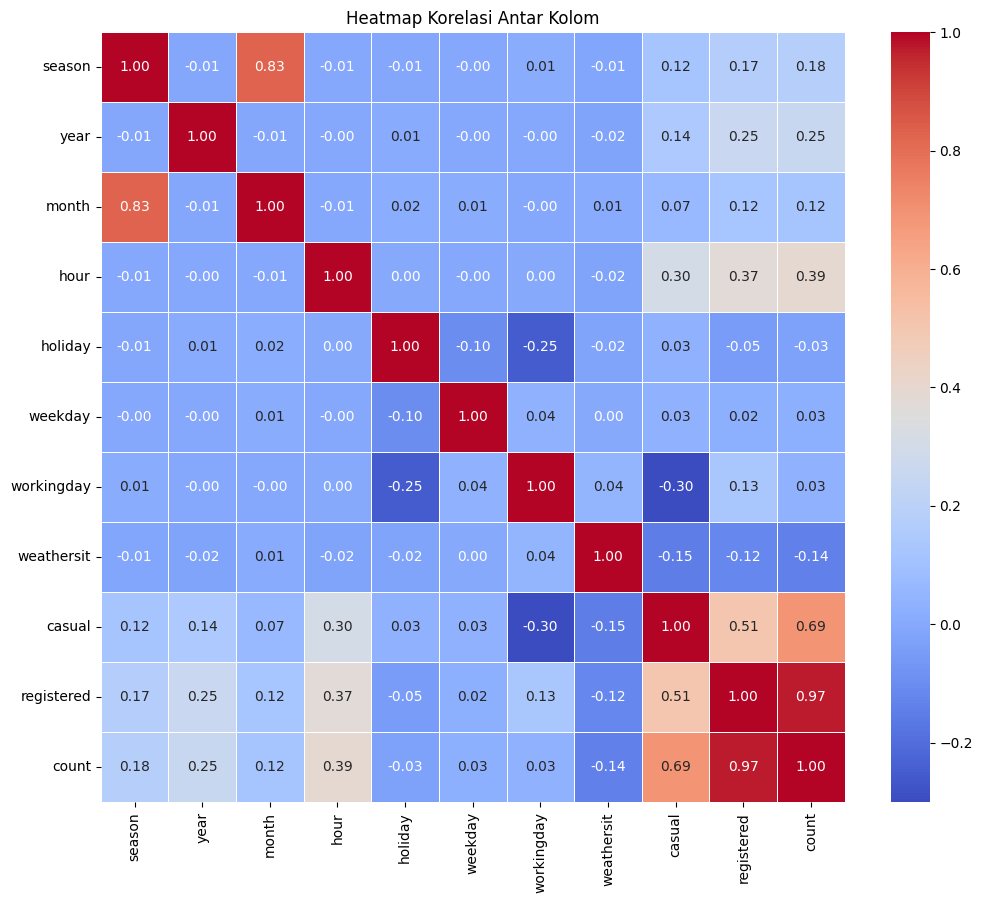

In [215]:
# Menghitung korelasi antara semua kolom numerik dalam DataFrame df_hour
correlation_matrix = df_hour.corr(numeric_only=True)

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

Dari tabel korelasi di atas diketahui bahwa:
- casual dan count memiliki korelasi yang kuat sebesar 0.69
- registered dan count memiliki korelasi yang mendekati sempurna sebesar 0.97
- registered dan casual memiliki korelasi yang cukup, sebesar 0.51
- month dan season memiliki korelasi yang hampir sempurna, sebesar 0.83

Selain itu, korelasi antar kolom yang lainnya cukup rendah dan ada yang tidak saling berkorelasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terjadi perbedaan signifikan dalam penggunaan sepeda pada weekday, holiday dan workingday?

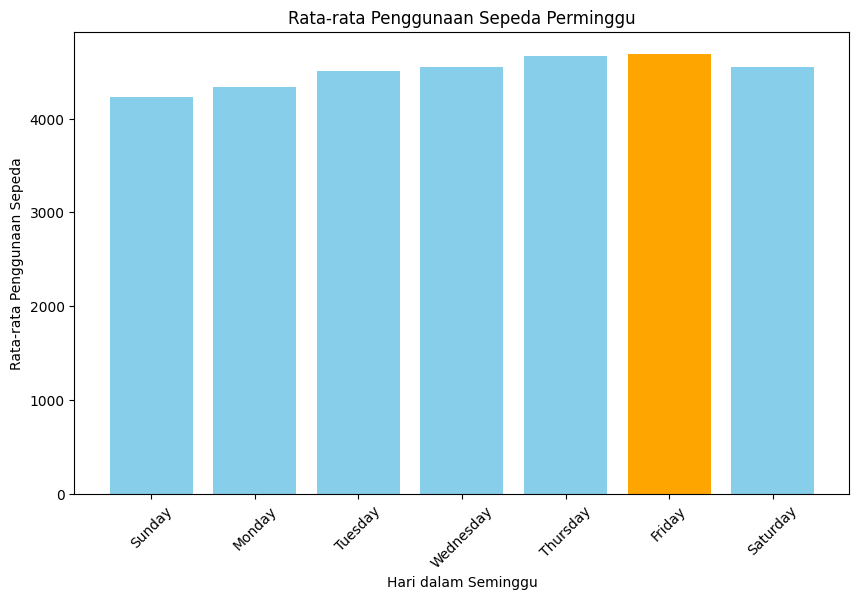

In [216]:
grouped_by_day_type = df_day.groupby('weekday').agg({'count': 'mean'}).reset_index()

# Mendefinisikan label untuk plot
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Mendefinisikan posisi pada sumbu x untuk setiap label hari
x = np.arange(len(labels))

# Menentukan warna untuk setiap bar
colors = ['skyblue' if c < max(grouped_by_day_type['count']) else 'orange' for c in grouped_by_day_type['count']]

# Menampilkan rata-rata penggunaan sepeda untuk setiap jenis hari
plt.figure(figsize=(10, 6))
plt.bar(x, grouped_by_day_type['count'], color=colors)
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.title('Rata-rata Penggunaan Sepeda Perminggu')
plt.xticks(x, labels, rotation=45)
plt.show()

Hasil di atas menunjukkan bahwa, rata-rata penggunaan sepeda pada weekday paling tinggi terjadi pada hari jum'at. Namun rata-rata penggunaan sepeda hari lain pun tidak jauh berbeda dengan hari jum'at.

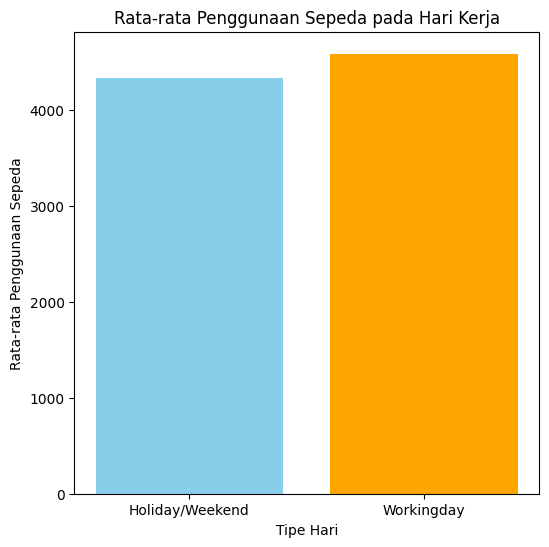

In [217]:
# Mengelompokkan data berdasarkan 'workingday'
grouped_by_workingday = df_day.groupby('workingday').agg({'count': 'mean'}).reset_index()

# Mendefinisikan label untuk plot
labels = ['Holiday/Weekend', 'Workingday']

# Mendefinisikan posisi pada sumbu x untuk setiap label
x = np.arange(len(labels))

# Menentukan warna untuk setiap bar berdasarkan workingday
colors = ['skyblue', 'orange']

# Menampilkan rata-rata penggunaan sepeda untuk setiap jenis hari
plt.figure(figsize=(6, 6))
plt.bar(x, grouped_by_workingday['count'], color=colors)
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.title('Rata-rata Penggunaan Sepeda pada Hari Kerja')
plt.xticks(x, labels)
plt.show()

Hasil di atas menunjukkan bahwa, rata-rata penggunaan sepeda paling banyak dilakukan pada workingday.

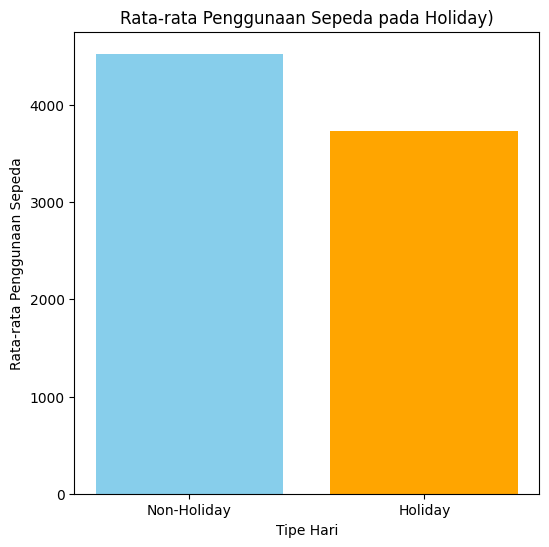

In [218]:
# Mengelompokkan data berdasarkan 'holiday'
grouped_by_holiday = df_day.groupby('holiday').agg({'count': 'mean'}).reset_index()

# Mendefinisikan label untuk plot
labels = ['Non-Holiday', 'Holiday']

# Mendefinisikan posisi pada sumbu x untuk setiap label
x = np.arange(len(labels))

# Menentukan warna untuk setiap bar berdasarkan 'holiday'
colors = ['skyblue', 'orange']

# Menampilkan rata-rata penggunaan sepeda untuk setiap jenis hari
plt.figure(figsize=(6, 6))
plt.bar(x, grouped_by_holiday['count'], color=colors)
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.title('Rata-rata Penggunaan Sepeda pada Holiday)')
plt.xticks(x, labels)
plt.show()

Hasil di atas menunjukkan bahwa, pada holiday penggunaan sepeda tidak banyak dilakukan, lebih banyak sepeda digunakan pada Non-Holiday.

### Pertanyaan 2: Apakah terjadi peningkatan penggunaan sepeda dari tahun 2011 ke 2012?

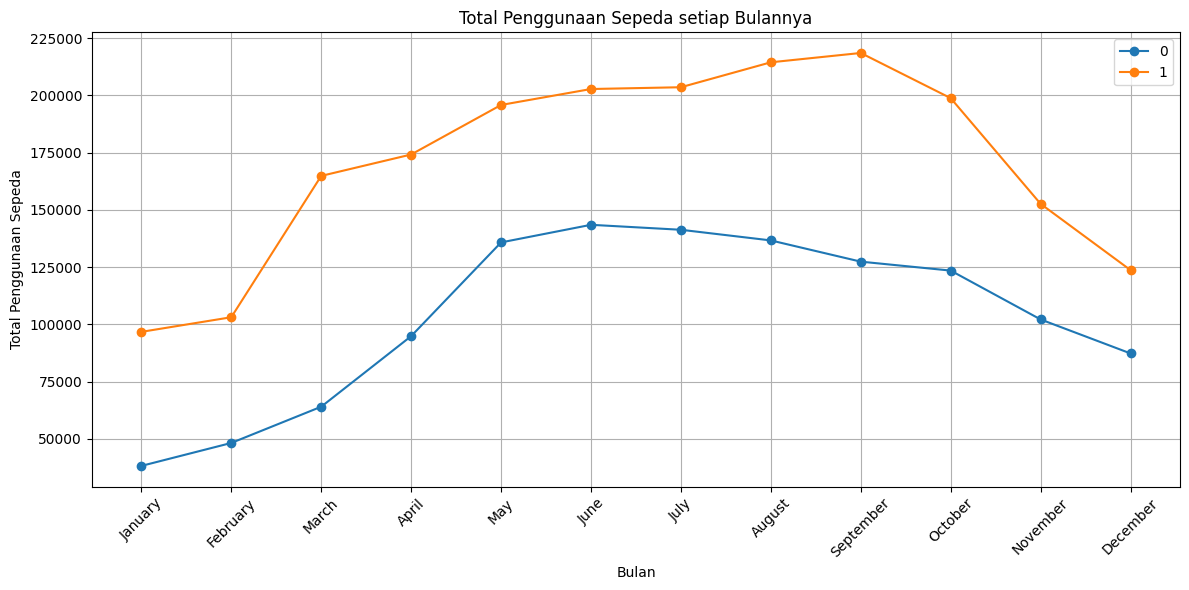

In [219]:
# Mengelompokkan data berdasarkan tahun (year) dan bulan (mnth) serta menghitung total penggunaan sepeda untuk setiap tahun dan bulan
total_bike_usage_per_month = df_day.groupby(['year', 'month'])['count'].sum().unstack()

# Memvisualisasikan total penggunaan sepeda untuk setiap tahun dan bulan
plt.figure(figsize=(12, 6))

# Plot garis untuk setiap tahun
for year in total_bike_usage_per_month.index:
    plt.plot(total_bike_usage_per_month.columns, total_bike_usage_per_month.loc[year], marker='o', label=str(year))

# Menambahkan keterangan pada sumbu x
plt.xlabel('Bulan')
plt.ylabel('Total Penggunaan Sepeda')
plt.title('Total Penggunaan Sepeda setiap Bulannya')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Hasil di atas menunjukkan bahwa dari tahun 2011 ke 2012 terjadi banyak peningkatan peminjaman sepeda yang dilakukan.

### Pertanyaan 3: Apakah ada jam-jam tertentu yang menunjukkan peningkatan peminjaman sepeda?

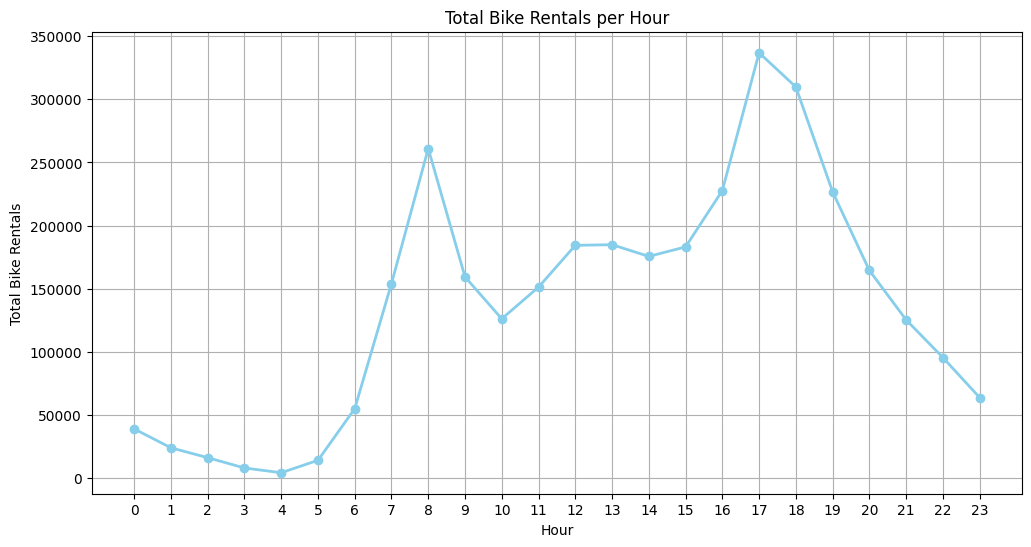

In [220]:
# Kelompokkan data berdasarkan jam (hour) dan hitung total peminjaman sepeda untuk setiap jam
hourly_bike_rentals = df_hour.groupby('hour')['count'].sum()

# Visualisasikan data
plt.figure(figsize=(12, 6))
plt.plot(hourly_bike_rentals.index, hourly_bike_rentals.values, marker='o', color='skyblue', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals per Hour')
plt.xticks(range(24))  # Menentukan label jam dari 0 hingga 23
plt.grid(True)
plt.show()

Hasil di atas menunjukkan bahwa, pada pukul 17 terjadi banyak peminjaman sepeda.

### Pertanyaan 4: Dapatkah musim mempengaruhi peminjaman sepeda pada casual user dan registered user?

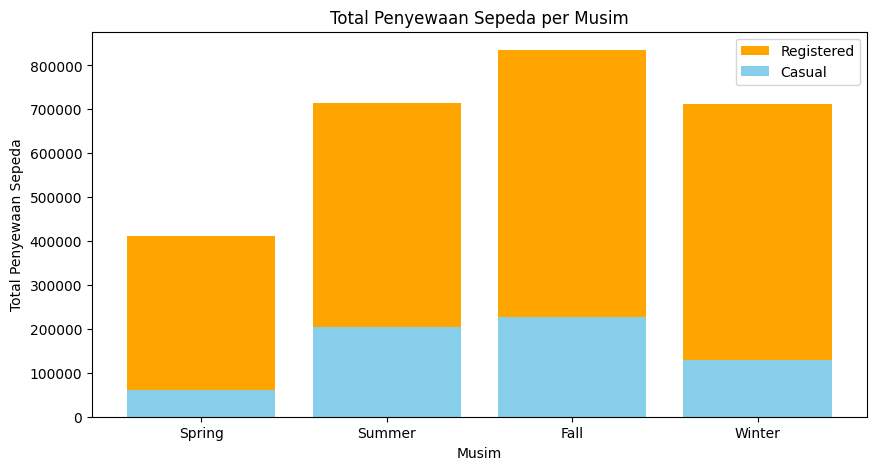

In [221]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

seasonal_bike_rentals = df_day.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10,5))

plt.bar(seasonal_bike_rentals['season'],seasonal_bike_rentals['registered'],label='Registered',color= 'orange')

plt.bar(seasonal_bike_rentals['season'], seasonal_bike_rentals['casual'], label='Casual',color= 'skyblue')

# Menambahkan label musim di sumbu x
plt.xticks(seasonal_bike_rentals['season'], seasons)

plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Total Penyewaan Sepeda per Musim')
plt.legend()
plt.show()


Hasil di atas menunjukkan bahwa, baik registered user dan casual user melakukan peminjaman sepeda pada Musin Gugur, namun pada casual user antara musin panas dan musim gugur perbedaannya tidak cukup banyak.

### Pertanyaan 5: Apakah cuaca dapat mempengaruhi jumlah pengguna sepeda?

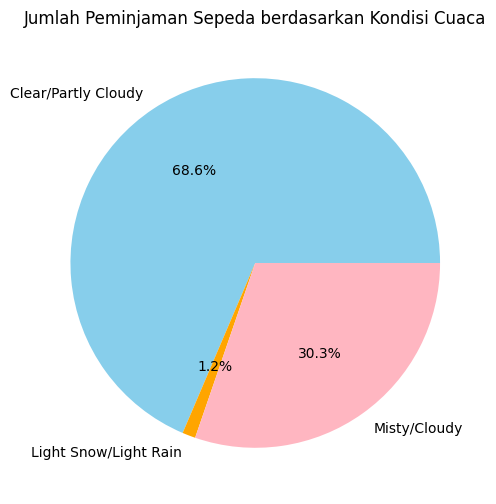

In [226]:
# Buat mapping untuk mengonversi kode cuaca menjadi deskripsi cuaca yang sesuai
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain'
}

# Melakukan pemetaan deskripsi cuaca ke dalam DataFrame
df_day['weather_desc'] = df_day['weathersit'].map(weather_mapping)

rentals_weather = df_day.groupby('weather_desc')['count'].sum().reset_index()
# Membuat visualisasi
plt.figure(figsize=(8, 6))

# Menggambar diagram lingkaran
plt.pie(rentals_weather['count'], labels=rentals_weather['weather_desc'], autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightpink', 'red'])
plt.title('Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca')

plt.show()

Hasil di atas menunjukkan bahwa, cuaca Clear/Partly Cloudy merupakan cuaca yang paling banyak dilakukan peminjaman sepeda.

## Conclusion

- Conclution pertanyaan 1: Dari hasil analisis di atas Dapat disimpulkan bahwa, penggunaan sepeda pada weekday, holiday dan workingday tidak terdapat perbedaan yang cukup signifikan dan dari ketiganya rata-rata penggunaan sepeda dilakukan pada hari-hari biasa bukan pada holiday ataupun weekend.

- Conclution pertanyaan 2: Dasi hasil analisis yang dilakukan, penggunaan sepeda dari tahun 2011 ke 2012 memang terjadi peningkatan penggunaan sepeda. Pada tahun 2011 angka tertinggi peminjaman terjadi pada bulan Juni yang hampir mencapai angka 150000, sedangkan pada tahun 2012 angka tertinggi peminjaman terjadi pada bulan September yang hampir menyentuh angka 225000.

- Conclution petanyaan 3: Dari hasil analisis yang dilakukan, jam 17 lah yang menunjukkan peningkatan peminjaman sepeda, kemudian yang kedua ada pada pukul 8.

- Conclution pertanyaan 4: Dari hasil analisis yang dilakukan, musim memang mempengaruhi peminjaman sepada baik pada registered user maupun pada casual user. Musim yang paling diminati dalam peminjaman sepeda adalah fall, disusul oleh summer, kemudian winter dan yang terakhir adalah spring.

- Conclution pertanyaan 5: Dari hasil analisis yang dilakukan, cuaca dapat mempengaruhi jumlah pengguna sepeda, hal ini terlihat jelas pada jumlah pengguna pada cuaca Clear/Partly Cloudy yang mencapai 68.7% dari total keseluruhan pengguna sepeda, kemudian kedua ada Misty/Cloudy sebesar 30.3% dan yang terakhir adalah light snow/light rain sebesar 1.2%.